In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()/len(df)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

<IPython.core.display.Javascript object>

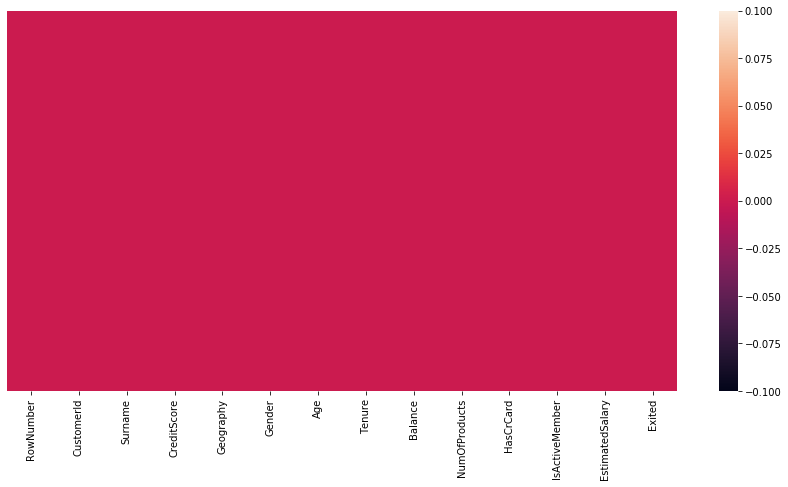

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False)

In [7]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<IPython.core.display.Javascript object>

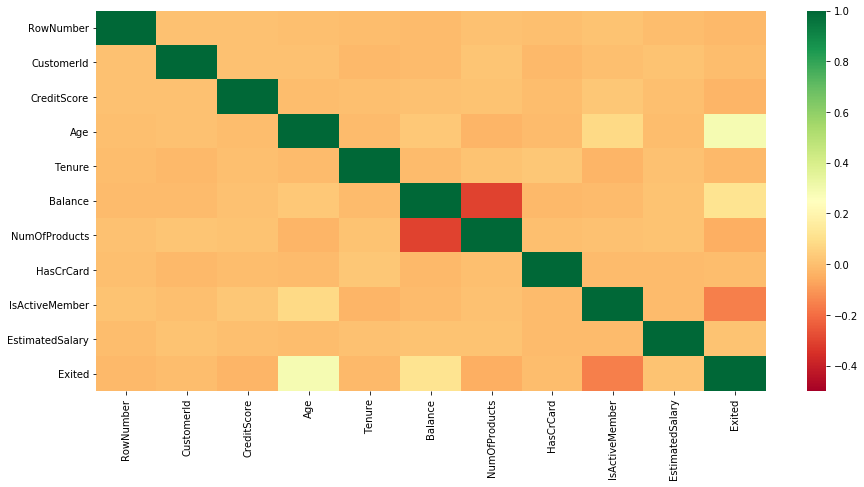

In [8]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='RdYlGn',vmin=-0.5)

In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [11]:
dfn=pd.get_dummies(df,drop_first=True)

In [12]:
dfn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [13]:
X = np.asarray(dfn[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']])
y= np.asarray(dfn[['Exited']])

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scl=StandardScaler()
X=scl.fit_transform(X)
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
import keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
Classifier=Sequential()

# Adding input layer
#Classifier.add(Dense(output_dim=6,init='glorot_uniform',activation='relu',input_dim=11))
Classifier.add(Dense(6, activation='relu', kernel_initializer='uniform',input_dim=11))
# Adding Second layer
Classifier.add(Dense(6,activation='relu',kernel_initializer='uniform'))
#Adding output layer
Classifier.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
#Compiling
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#fitting the model
Classifier.fit(X_train,y_train,batch_size=8,epochs=50)




Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4802 - accuracy: 0.7952
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4260 - accuracy: 0.7960
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4181 - accuracy: 0.8204
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4119 - accuracy: 0.8317
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4077 - accuracy: 0.8321
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4054 - accuracy: 0.8356
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4034 - accuracy: 0.8335
Epoch 8/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8350
Epoch 9/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4005 - accuracy: 0.8365
Epoch 10/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.400

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
ypred=Classifier.predict(X_test)
ypred=ypred>0.5
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [23]:
cm=confusion_matrix(y_test,ypred)
asc=accuracy_score(y_test,ypred)
print(cm)
asc

[[1499   96]
 [ 197  208]]


0.8535